## 导包

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from os import path
from PIL import Image
import cufflinks as cf
import plotly as py

# import plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

## 读取数据

In [173]:
world_cups = pd.read_csv('./data/WorldCups.csv')
world_cup_player = pd.read_csv('./data/WorldCupPlayers.csv')
world_cups_matches = pd.read_csv('./data/WorldCupMatches.csv')

In [174]:
world_cups.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


In [175]:
world_cup_player.head(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN


In [176]:
world_cups_matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


## 数据预处理

- 空值处理
- 国家名统一
- 字段类型转换

In [177]:
world_cup_player = world_cup_player.dropna()
world_cups = world_cups.dropna()
world_cups_matches = world_cups_matches.dropna()

In [178]:
world_cups = world_cups.replace('Germany FR', 'Germany')
world_cup_player = world_cup_player.replace('Germany FR', 'Germany')
world_cups_matches = world_cups_matches.replace('Germany FR', 'Germany')

In [179]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace('.', '').astype('int64')

<ipython-input-179-940844650a3c>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



## 清洗后的数据内容

In [180]:
world_cups.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000


In [181]:
world_cup_player.head(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'


In [182]:
world_cups_matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


## 相关性分析

In [183]:
world_cups.dataframeName = 'WorldCups.csv'
world_cup_player.dataframeName = 'WorldCupPlayers.csv'
world_cups_matches.dataframeName = 'WorldCupMatches.csv'

In [184]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='b')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'{filename}相关性分析', fontsize=15)
    plt.show()

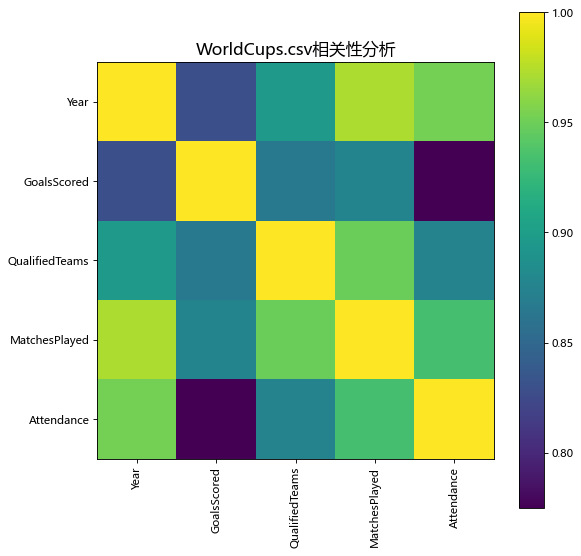

In [185]:
plotCorrelationMatrix(world_cups, 8)

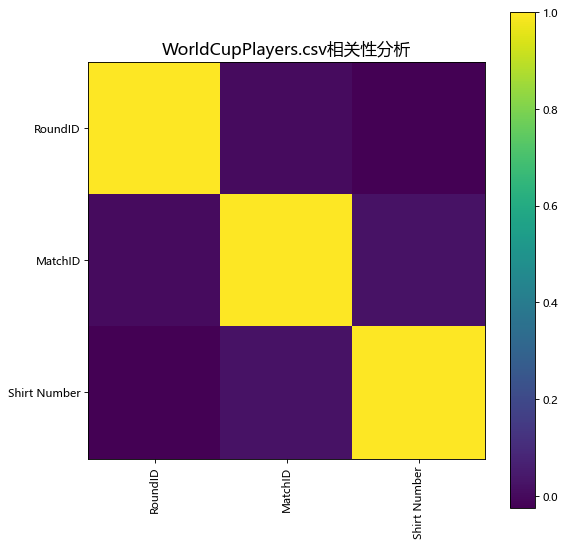

In [186]:
plotCorrelationMatrix(world_cup_player, 8)

## 冠军及四强分析

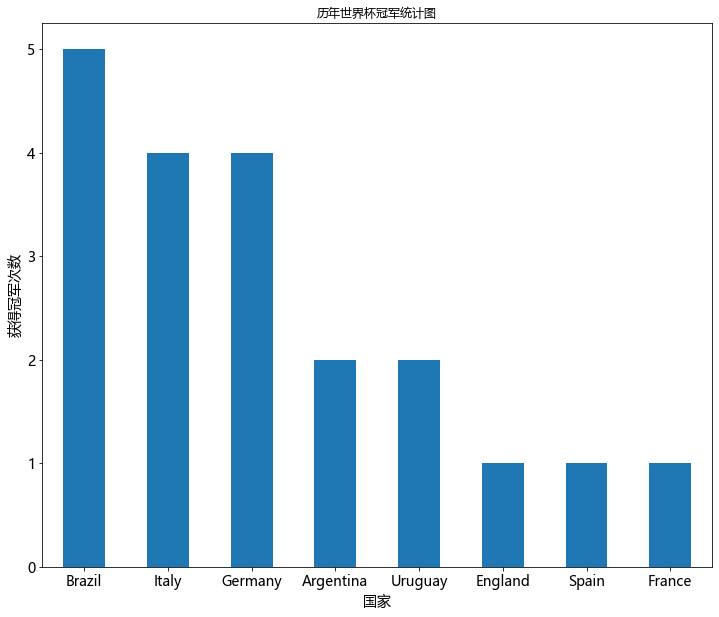

In [187]:
plt.rc("font", family='Microsoft YaHei')
fig=plt.figure()
winner=world_cups['Winner'].value_counts()
winner.plot(kind='bar',title="历年世界杯冠军统计图",fontsize=14,figsize=(12,10))
plt.xlabel('国家',fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('获得冠军次数',fontsize=14)
plt.savefig('冠军柱形图')
plt.show()

获奖过的国家
['Argentina', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Chile', 'Croatia', 'Czechoslovakia', 'England', 'France', 'Germany', 'Hungary', 'Italy', 'Korea', 'Republic', 'Netherlands', 'Poland', 'Portugal', 'Soviet', 'Union', 'Spain', 'Sweden', 'Turkey', 'USA', 'Uruguay', 'Yugoslavia', '']


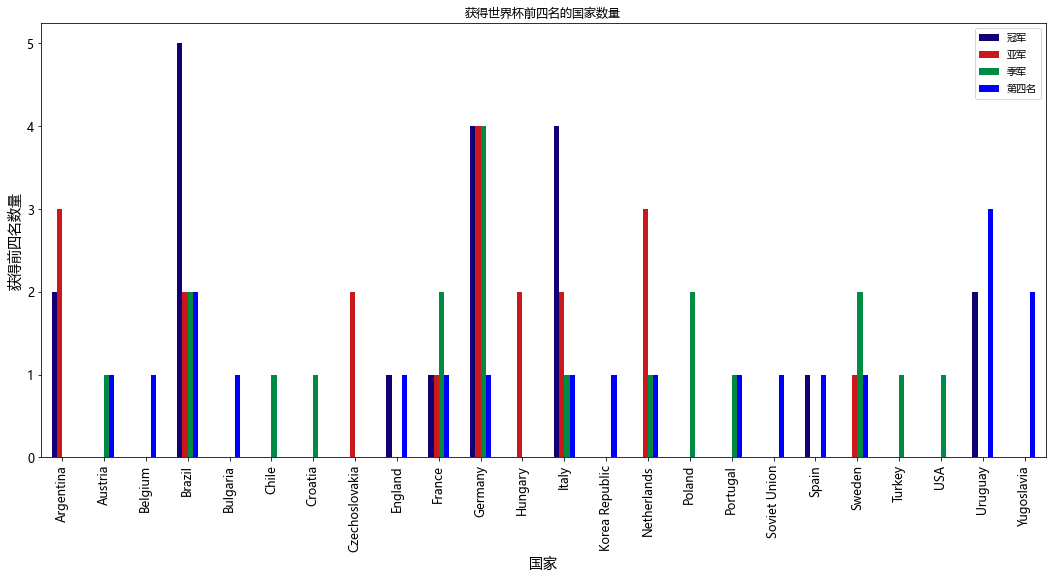

In [188]:
all_pos=world_cups[['Winner','Runners-Up','Third','Fourth']]
all_positions=all_pos.apply(pd.value_counts).fillna(0).astype(int)
print("获奖过的国家")
str = ""
for i in all_positions.index:
    str += i+" "
list_str = str.split(" ")
print(list_str)
all_positions.plot(y=['Winner','Runners-Up','Third','Fourth'],kind='bar',title="获得世界杯前四名的国家数量",
                   fontsize=12,figsize=(18,8),color=['#130074', '#CB181B', '#008B45', 'b'],
                   label=['冠军','亚军','季军','第四名'])
plt.xlabel('国家',fontsize=14)
plt.ylabel('获得前四名数量',fontsize=14)
# plt.savefig('柱形图统计前四名')
plt.show()

## 条形图

In [190]:
world_cups_matches['Datetime'] = pd.to_datetime(world_cups_matches['Datetime'])

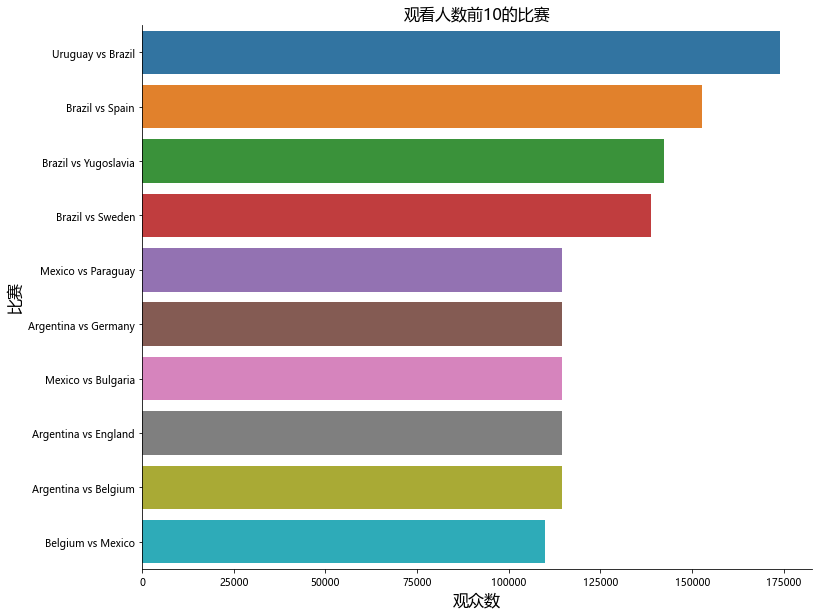

In [191]:
top10 = world_cups_matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)
plt.rc("font", family='Microsoft YaHei')
plt.ylabel('比赛',fontsize=16)
plt.xlabel('观众数',fontsize=16)
plt.title('观看人数前10的比赛',fontsize=16)
plt.savefig('条形图-比赛人数')
plt.show()

## 主客队得分对比及结果比较

<ipython-input-193-af66647db2b1>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



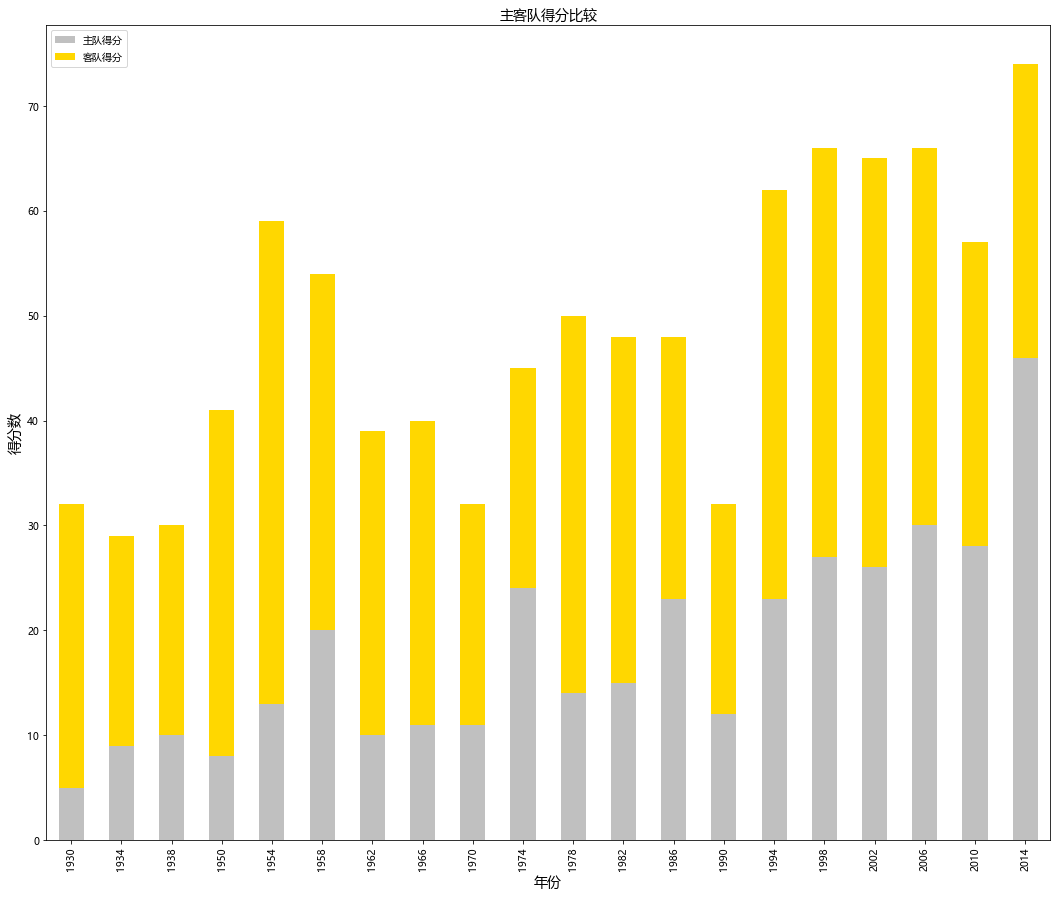

In [193]:
#Half time Goals of home and away team
Half_time=world_cups_matches.groupby('Year')['Half-time Home Goals','Half-time Away Goals'].sum().reset_index().astype(int)
df=pd.DataFrame({'Half-time Away Goals':Half_time['Half-time Away Goals'],'Half-time Home Goals':Half_time['Half-time Home Goals']})
df.plot(kind='bar',stacked=True,figsize=(18,15),color =['silver','gold'])
plt.title('主客队得分比较',fontsize=14)
r=range(0,20)
plt.xticks(r,Half_time['Year'])
plt.xlabel('年份',fontsize=14)
plt.ylabel('得分数',fontsize=14)
plt.legend(labels = ['主队得分','客队得分'])
plt.savefig('堆积柱形图')
plt.show()

In [194]:

def get_labels(world_cups_matches):
    if world_cups_matches['Home Team Goals'] > world_cups_matches['Away Team Goals']:
        return '主队获胜'
    if world_cups_matches['Home Team Goals'] < world_cups_matches['Away Team Goals']:
        return '客队获胜'
    return '平局'

In [195]:
world_cups_matches['交战结果'] = world_cups_matches.apply(lambda x: get_labels(x), axis=1)

In [196]:
world_cups_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,difference_goals,交战结果
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,3.0,主队获胜
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0,主队获胜
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,1.0,主队获胜
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,2.0,主队获胜
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0,主队获胜


In [197]:
mt = world_cups_matches['交战结果'].value_counts()

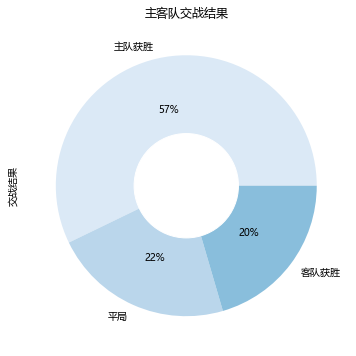

In [198]:
plt.rc("font", family='Microsoft YaHei')
plt.figure(figsize = (15,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('Blues'))

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('主客队交战结果')
plt.savefig('交战结果图')
plt.show()

## 主客场得分分布分析

<class 'pandas.core.frame.DataFrame'>
     Year  Home Team Goals  Year  Away Team Goals
0    1930                4  1930                1
1    1930                3  1930                0
2    1930                2  1930                1
3    1930                3  1930                1
4    1930                1  1930                0
..    ...              ...   ...              ...
836  2014                1  2014                1
837  2014                2  2014                0
838  2014                2  2014                1
839  2014                1  2014                1
840  2014                2  2014                0

[840 rows x 4 columns]


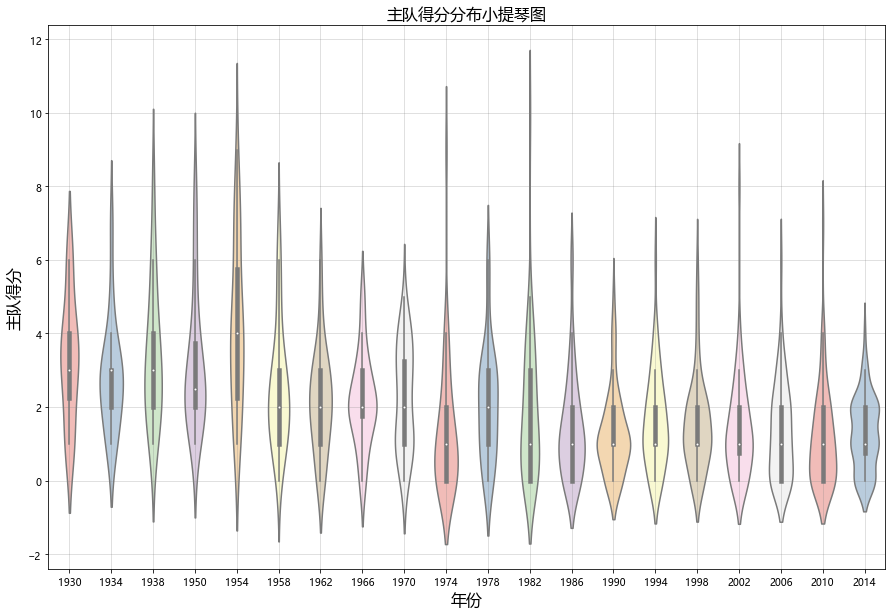

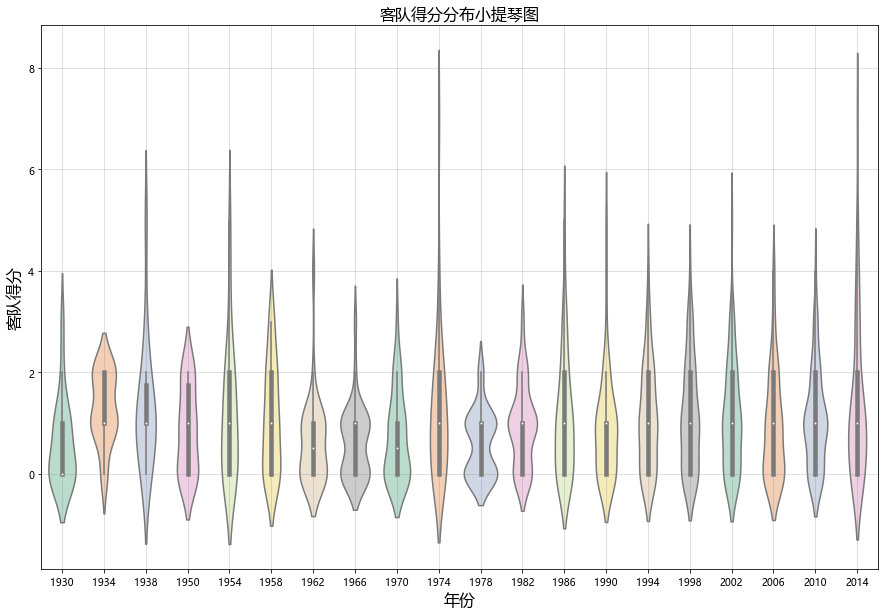

In [199]:
home_team1=world_cups_matches[['Year','Home Team Goals']]
home_team1.head(840)

# plt.figure(figsize=(30,15))
#主队
# plt.subplot(121)
home_team=world_cups_matches[['Year','Home Team Goals']].head(840).astype(int)
away_team=world_cups_matches[['Year','Away Team Goals']].head(840).astype(int)
team = pd.concat([home_team, away_team], axis=1, join='inner')
print(type(team))
print(team)
plt.figure(figsize=(15,10))
sns.violinplot(x=home_team['Year'],y=home_team['Home Team Goals'],palette='Pastel1')
plt.grid(True,color='grey',alpha=0.3)
plt.title("主队得分分布小提琴图",fontsize=16)
plt.xlabel('年份',fontsize=16)
plt.ylabel('主队得分',fontsize=16)
plt.savefig('小提琴图1')
plt.show()
#客队  Away Team Goals
# plt.subplot(122)
away_team=world_cups_matches[['Year','Away Team Goals']].head(840).astype(int)
plt.figure(figsize=(15,10))
sns.violinplot(x=away_team['Year'],y=away_team['Away Team Goals'],palette='Pastel2')
plt.grid(True,color='grey',alpha=0.3)
plt.title("客队得分分布小提琴图",fontsize=16)
plt.xlabel('年份',fontsize=16)
plt.ylabel('客队得分',fontsize=16)
plt.savefig('小提琴图2')
plt.show()

## 著名足球强国、球员、教练词云图分析

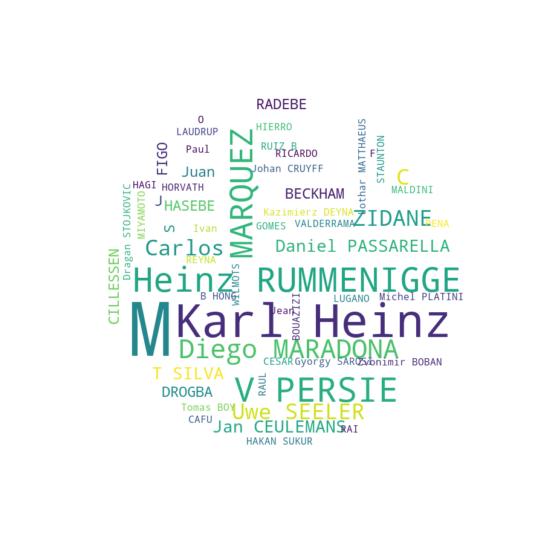

In [200]:
plt.figure(figsize=(15,10))
name=np.array(Image.open('zu.jpg'))
worldcloud=WordCloud(scale=4,background_color='white',mask=name,max_words=5000,mode='RGBA').generate(' '.join(world_cup_player['Player Name']))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('球员图')
plt.show()

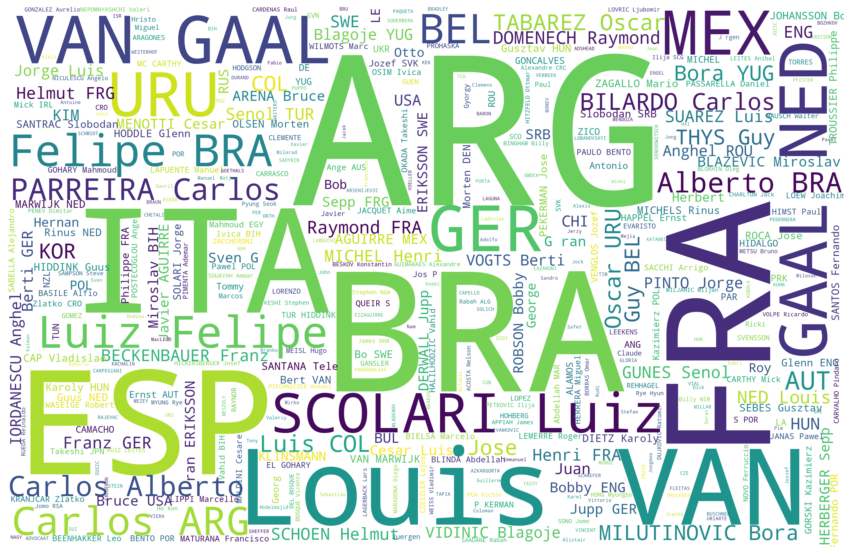

In [201]:
plt.figure(figsize=(15,10))
name=np.array(Image.open('tiqiu.jpg'))
wordcloud=WordCloud(scale=4,background_color='white',mask=name,max_words=5000).generate(' '.join(world_cup_player['Coach Name']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('教练图')
plt.show()